# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [0]:
# TODO: code and runtime results

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [0]:
link1='https://drive.google.com/open?id=1-Yv1VSBF-wl67pXk9EVW1EQp0KR45izC'

fluff, id = link1.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_transaction.csv') 
transaction_df = pd.read_csv('train_transaction.csv')

1-Yv1VSBF-wl67pXk9EVW1EQp0KR45izC


In [0]:
link2='https://drive.google.com/open?id=1yFIu4FUkSeG8F9lsnANgrysCmCOaewed'

fluff, id2 = link2.split('=')
print (id2) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('train_identity.csv') 
identity_df = pd.read_csv('train_identity.csv')

1yFIu4FUkSeG8F9lsnANgrysCmCOaewed


In [0]:
#splitting the transaction data into fraud data and non-fraud data
fraudulent_transaction_df = transaction_df[transaction_df['isFraud']==1]
non_fraudulent_transaction_df= transaction_df[transaction_df['isFraud']==0]

In [0]:
#merging the transaction file and idendity file
innerJoin = pd.merge(transaction_df, identity_df, on='TransactionID', how='inner')

In [0]:
#splitting the merged data into fraud data and non-fraud data
fraudulent_inner = innerJoin[innerJoin['isFraud']==1]
non_fraudulent_inner= innerJoin[innerJoin['isFraud']==0]

In [0]:
TransactionID

### TransactionID

Just by looking at the transaction ids of the fraudulent and the non-fraudulent  transactions, we are not able to gain much insight. The histogram of the data is shown below:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb982498a20>]],
      dtype=object)

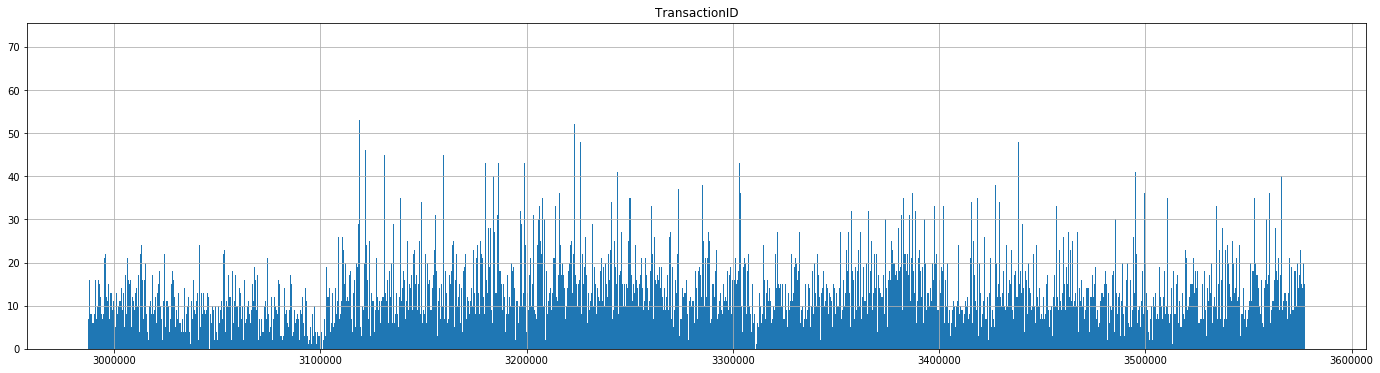

In [0]:
fraudulent_transaction_df.hist(column='TransactionID',figsize=[24,6] ,bins=1500)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb982130128>]],
      dtype=object)

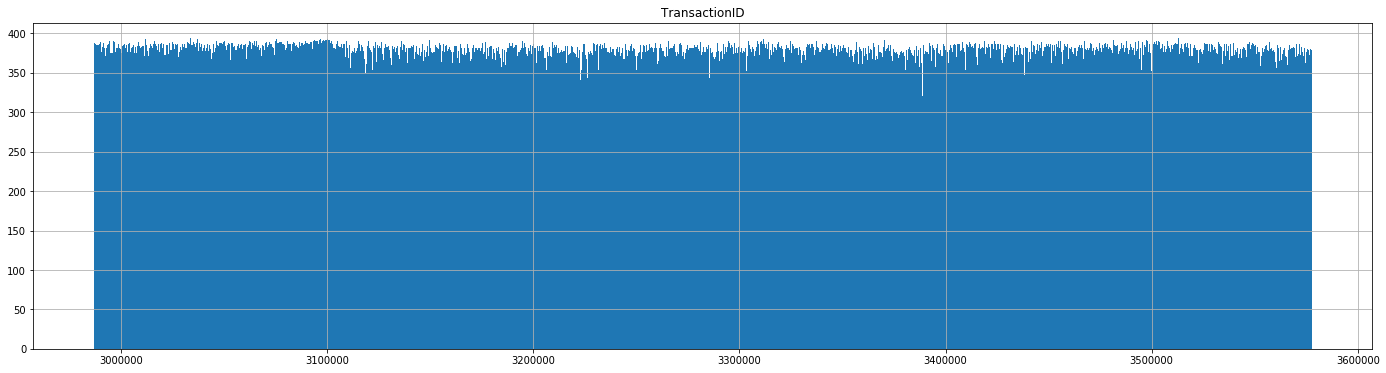

In [0]:
non_fraudulent_transaction_df.hist(column='TransactionID',figsize=[24,6] ,bins=1500)

### DeviceType

After merging the two files, we are able to have a look at the DeviceType field properly. Through the graphs below, we are able to see that fraudulent transactions frequency is the same as the non-fraudulent transaction in the mobile and desktop devices.

We then see that the non-fraud transactions that take place. Here desktop devices have more trnsactions. Thus it appears that mobile devices are comparitively unsafe. 

In [0]:
fraudulent_inner['DeviceType'].value_counts()

mobile     5657
desktop    5554
Name: DeviceType, dtype: int64

In [0]:
non_fraudulent_inner['DeviceType'].value_counts()

desktop    79611
mobile     49988
Name: DeviceType, dtype: int64

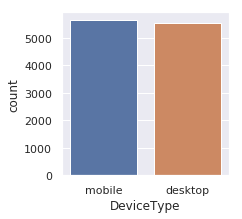

In [0]:
sns.set(rc={'figure.figsize':(3,3)})
sns.countplot(x="DeviceType", data=fraudulent_inner);

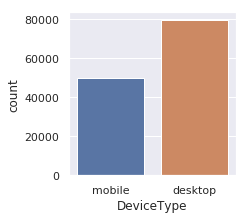

In [0]:
sns.countplot(x="DeviceType", data=non_fraudulent_inner);

### DeviceInfo 

Here we see that most of the fraud transactions occur in the Windows and iOS devices.

Comparing the non-fraud transactions, we see that MacOS and Trident/7.0 have high occurences, but they dont have much fraud occurences. Thus making them comparitively safer.

In [0]:
fraudulent_inner_deviceInfo =fraudulent_inner['DeviceInfo'].value_counts()
fraudulent_inner_deviceInfo.head(8)

Windows                   3121
iOS Device                1240
MacOS                      278
hi6210sft Build/MRA58K     180
SM-A300H Build/LRX22G      169
rv:57.0                    103
Trident/7.0                 96
rv:11.0                     76
Name: DeviceInfo, dtype: int64

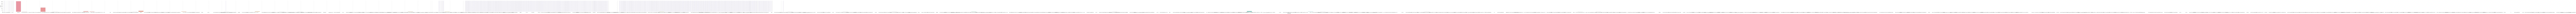

In [0]:
sns.set(rc={'figure.figsize':(900,4)})
sns.countplot(x="DeviceInfo", data=fraudulent_inner);

In [0]:
non_fraudulent_inner_deviceInfo =non_fraudulent_inner['DeviceInfo'].value_counts()
non_fraudulent_inner_deviceInfo.head(8)

Windows                  44601
iOS Device               18542
MacOS                    12295
Trident/7.0               7344
rv:11.0                   1825
rv:57.0                    859
SM-J700M Build/MMB29K      489
SM-G610M Build/MMB29K      424
Name: DeviceInfo, dtype: int64

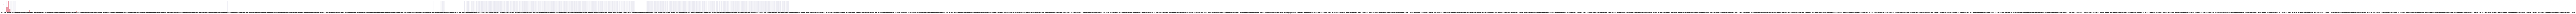

In [0]:
sns.countplot(x="DeviceInfo", data=non_fraudulent_inner);

### TransactionDT 

Here we see that the count of fraud transactions is proportional to the count of non-fraud transactions. Both the fraud and non-fraud transactions decrease till about hour 10, and after that both of then increase to hover round their respective maximum values.

In [0]:
#converting the TransactionDT to hours for the respective fraud and non-fraud transactions

fraudDT = pd.to_datetime(fraudulent_transaction_df.TransactionDT, unit='s').dt.hour
NotfraudDT = pd.to_datetime(non_fraudulent_transaction_df.TransactionDT, unit='s').dt.hour

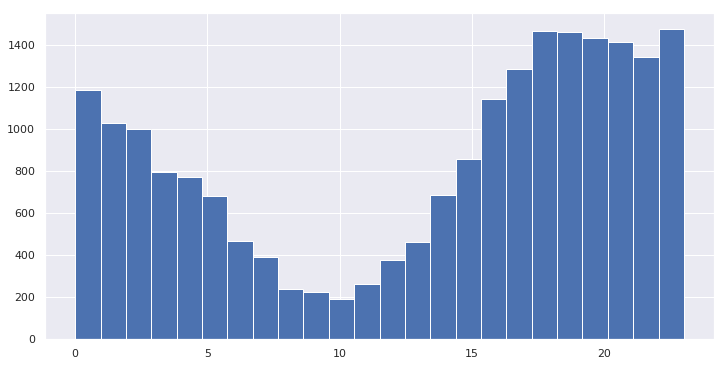

In [0]:
fraudDT.hist(figsize=[12,6] ,bins=24)

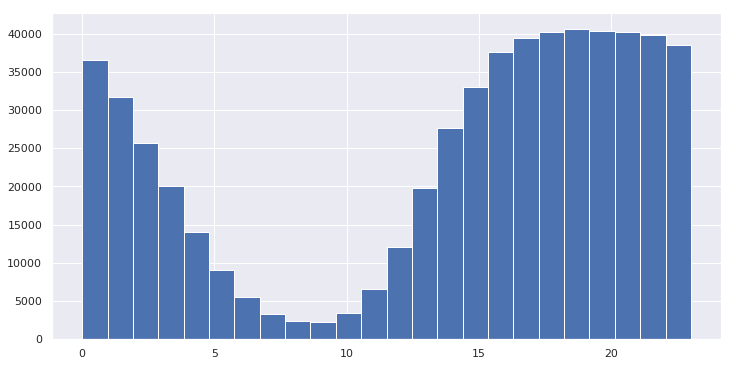

In [0]:
NotfraudDT.hist(figsize=[12,6] ,bins=24)

### TransactionAmt

Here we compare the fraud transactions amounts to the non-fraud transaction amounts.
For the fraud transactions we can see that the average fraud is about 150, but it has a large standard deviation of about 230. Here we notice that 75% of the fraud transactions occur between the amount of 0 and 161. While the top 25% occur between 161 and 5191.


For the non-fraud transactions we can see that the average fraud is about 135, but it has a large standard deviation of about 240. Here we notice that 75% of the fraud transactions occur between the amount of 0 and 120.While the top 25% occur between 130 and 31937.

In [0]:
fraudulent_transaction_df['TransactionAmt'].describe()


count    20663.000000
mean       149.244779
std        232.212163
min          0.292000
25%         35.044000
50%         75.000000
75%        161.000000
max       5191.000000
Name: TransactionAmt, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97acdeef0>]],
      dtype=object)

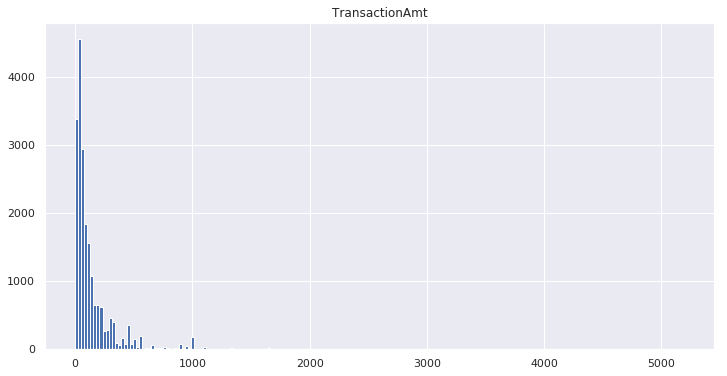

In [0]:
fraudulent_transaction_df.hist(column='TransactionAmt',figsize=[12,6] ,bins=200)


In [0]:
non_fraudulent_transaction_df['TransactionAmt'].describe()


count    569877.000000
mean        134.511665
std         239.395078
min           0.251000
25%          43.970000
50%          68.500000
75%         120.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97ad27710>]],
      dtype=object)

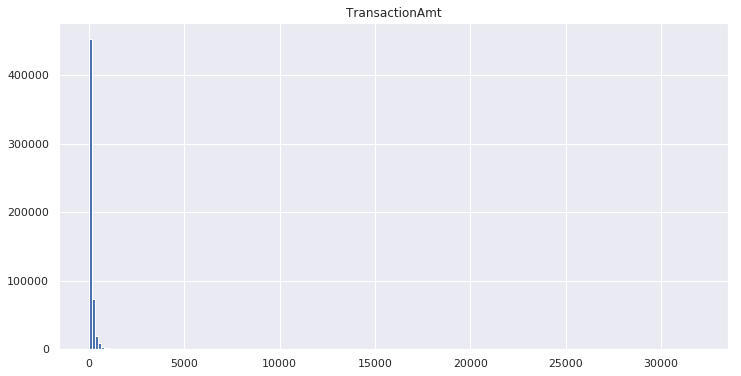

In [0]:
non_fraudulent_transaction_df.hist(column='TransactionAmt',figsize=[12,6] ,bins=200)

### ProductCD 


Here we compare the product code of the fraud and non-fraud transactions. Here we see that the product code C has very high fradulent to non-fradulent transaction ratio. For 8008 fraud transactions it has 60511 non-fraud transactions. 


In [0]:
fraudulent_transaction_df['ProductCD'].value_counts()

W    8969
C    8008
H    1574
R    1426
S     686
Name: ProductCD, dtype: int64

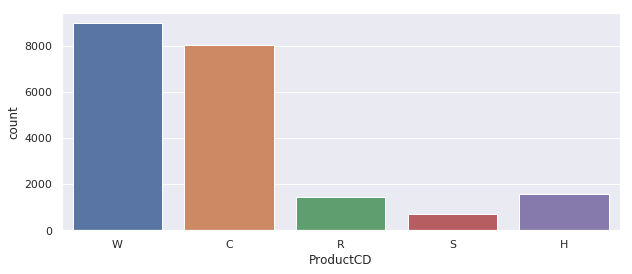

In [0]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x="ProductCD", data=fraudulent_transaction_df);

In [0]:
non_fraudulent_transaction_df['ProductCD'].value_counts()

W    430701
C     60511
R     36273
H     31450
S     10942
Name: ProductCD, dtype: int64

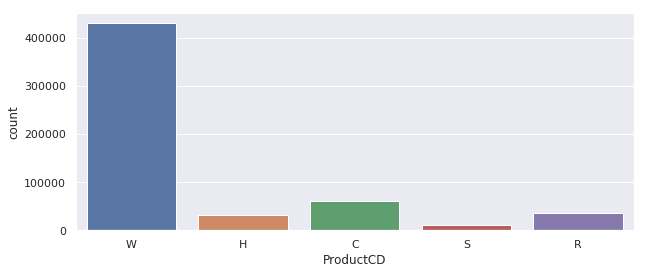

In [0]:
sns.countplot(x="ProductCD", data=non_fraudulent_transaction_df);

### card4 (card issuer)


Here we compare the card issuer of the fraud and non-fraud transactions. Here we see that the Visa, mastercard and american express have similar  fradulent to non-fradulent transaction ratio of about 0.03. While discover has slightly higher  fradulent to non-fradulent transaction ratio of about 0.08

In [0]:
fraudulent_transaction_df['card4'].value_counts()

visa                13373
mastercard           6496
discover              514
american express      239
Name: card4, dtype: int64

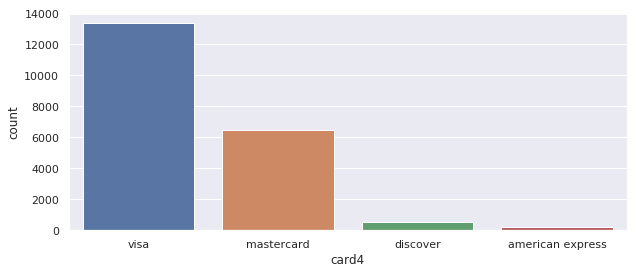

In [0]:
sns.countplot(x="card4", data=fraudulent_transaction_df);

In [0]:
non_fraudulent_transaction_df['card4'].value_counts()

visa                371394
mastercard          182721
american express      8089
discover              6137
Name: card4, dtype: int64

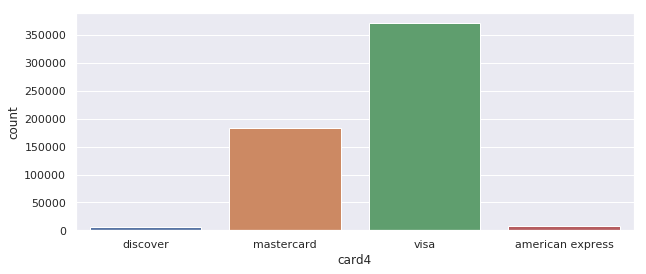

In [0]:
sns.countplot(x="card4", data=non_fraudulent_transaction_df);

### card6 (debit/credit)

Here we compare the card type  - debit vs credit in the fraud and non fraud data.
We see that although debit and credit cards have similar number of fraud transactions, debit card has more number of non-fraudulent transactions. Thus making it comparitively safer.


In [0]:
fraudulent_transaction_df['card6'].value_counts()

debit     10674
credit     9950
Name: card6, dtype: int64

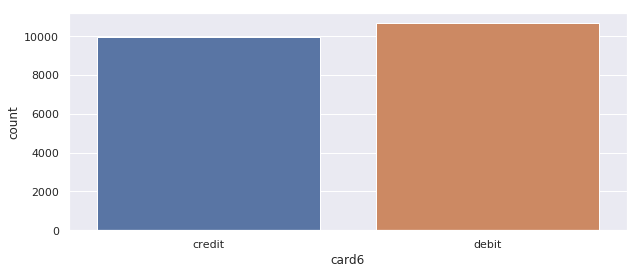

In [0]:
sns.countplot(x="card6", data=fraudulent_transaction_df);

In [0]:
non_fraudulent_transaction_df['card6'].value_counts()

debit              429264
credit             139036
debit or credit        30
charge card            15
Name: card6, dtype: int64

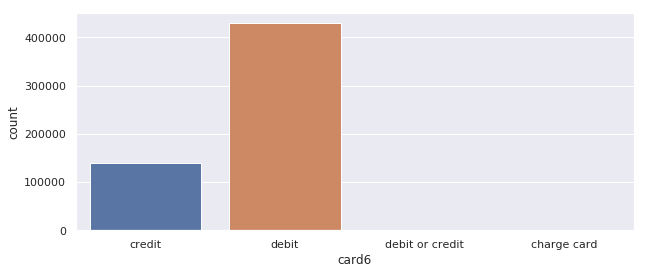

In [0]:
sns.countplot(x="card6", data=non_fraudulent_transaction_df);

### P_emaildomain (purchaser email)

Here we compare the domain names of the person making the purchase. We see that gmail, hotmail, and yahoo have higher incidents of fraud transactions. 

Lookink at the fraud to non-fraud transaction ratios we see that all three of them hover around 0.02 - 0.04 range


In [0]:
fraudulent_transaction_df['P_emaildomain'].value_counts().head(10)

gmail.com        9943
hotmail.com      2396
yahoo.com        2297
anonymous.com     859
aol.com           617
outlook.com       482
comcast.net       246
icloud.com        197
mail.com          106
msn.com            90
Name: P_emaildomain, dtype: int64

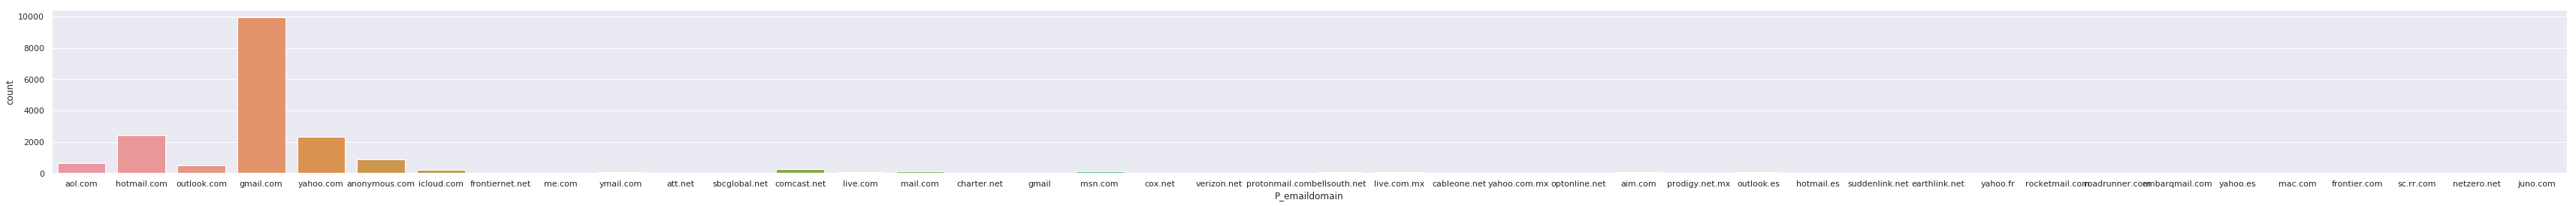

In [0]:
sns.set(rc={'figure.figsize':(60,4)})
sns.countplot(x="P_emaildomain", data=fraudulent_transaction_df);

In [0]:
non_fraudulent_transaction_df['P_emaildomain'].value_counts().head(10)

gmail.com        218412
yahoo.com         98637
hotmail.com       42854
anonymous.com     36139
aol.com           27672
comcast.net        7642
icloud.com         6070
outlook.com        4614
att.net            4003
msn.com            4002
Name: P_emaildomain, dtype: int64

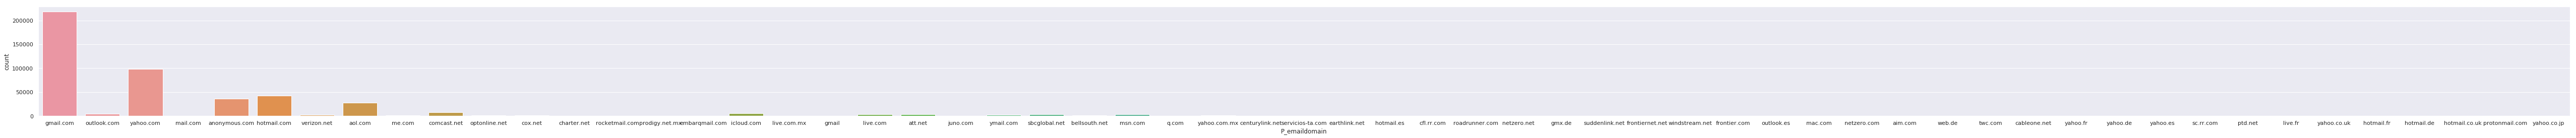

In [0]:
sns.set(rc={'figure.figsize':(90,4)})
sns.countplot(x="P_emaildomain", data=non_fraudulent_transaction_df);

### R_emaildomain (recipient email)

Here we compare the domain names of the recipient emaail. We see that gmail and hotmailhave higher incidents of fraud transactions. 

But Looking at the fraud to non-fraud transaction ratios we see that most of them hover around 0.04 - 0.1 range. This does not give us much insight.

In [0]:
fraudulent_transaction_df['R_emaildomain'].value_counts().head(10)


gmail.com        6811
hotmail.com      2140
yahoo.com         610
anonymous.com     598
outlook.com       414
icloud.com        180
aol.com           129
outlook.es         57
mail.com           46
live.com.mx        44
Name: R_emaildomain, dtype: int64

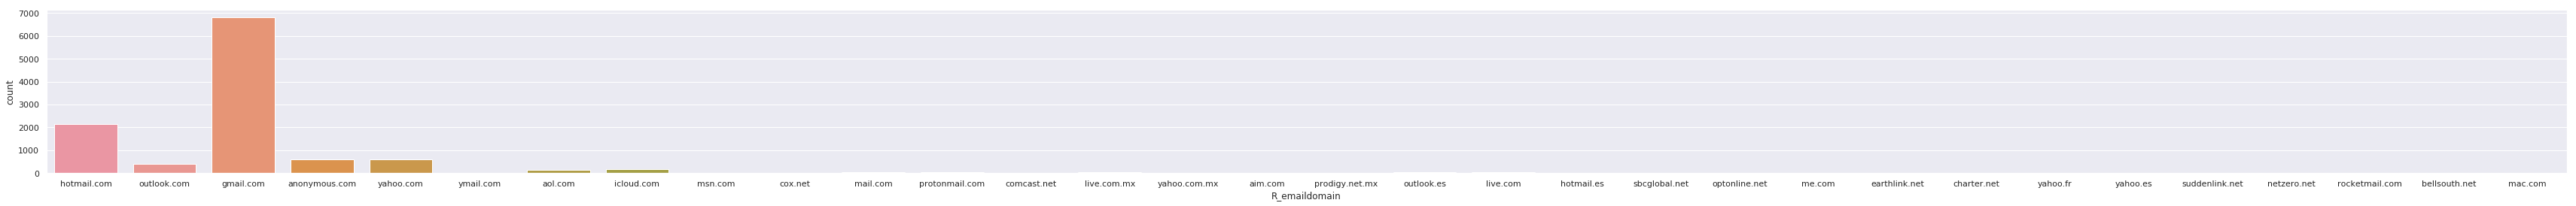

In [0]:

sns.set(rc={'figure.figsize':(60,4)})
sns.countplot(x="R_emaildomain", data=fraudulent_transaction_df);


In [0]:
non_fraudulent_transaction_df['R_emaildomain'].value_counts().head(10)


gmail.com        50336
hotmail.com      25369
anonymous.com    19931
yahoo.com        11232
aol.com           3572
outlook.com       2093
comcast.net       1791
yahoo.com.mx      1492
icloud.com        1218
msn.com            851
Name: R_emaildomain, dtype: int64

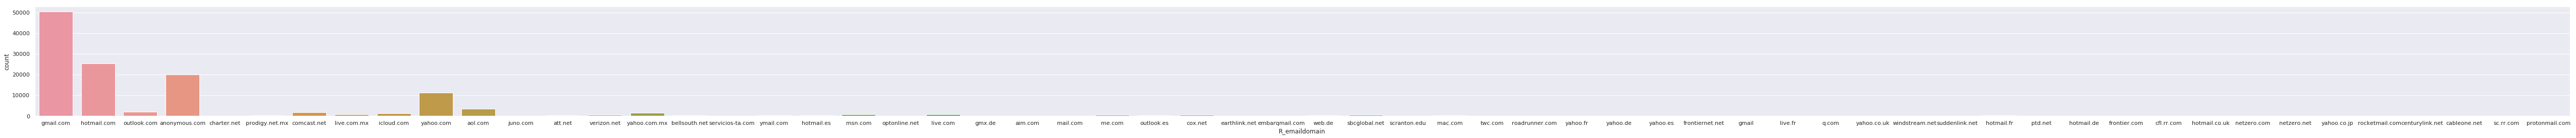

In [0]:

sns.set(rc={'figure.figsize':(90,4)})
sns.countplot(x="R_emaildomain", data=non_fraudulent_transaction_df);

### addr1 / addr2 (billing region / billing country)

Looking at the addr1 values of the fraud data we see that regions 204, 325,299, and 330 have higher fraud transactions as compared to other regions. But at the same time they have high non-fradulent transactions as well. Giving them a ratio of about 0.02 for fraud to non-fraud transactions.

For the addr2 values, we see that country 87 has the highest fraud transactions at 12477, but at the same time, it also has the highest non-fraud transactions too at 508004.

In [0]:
fraudulent_transaction_df['addr1'].value_counts().head(10)


204.0    1120
325.0    1087
299.0     985
330.0     840
264.0     728
272.0     576
441.0     533
337.0     439
315.0     411
123.0     398
Name: addr1, dtype: int64

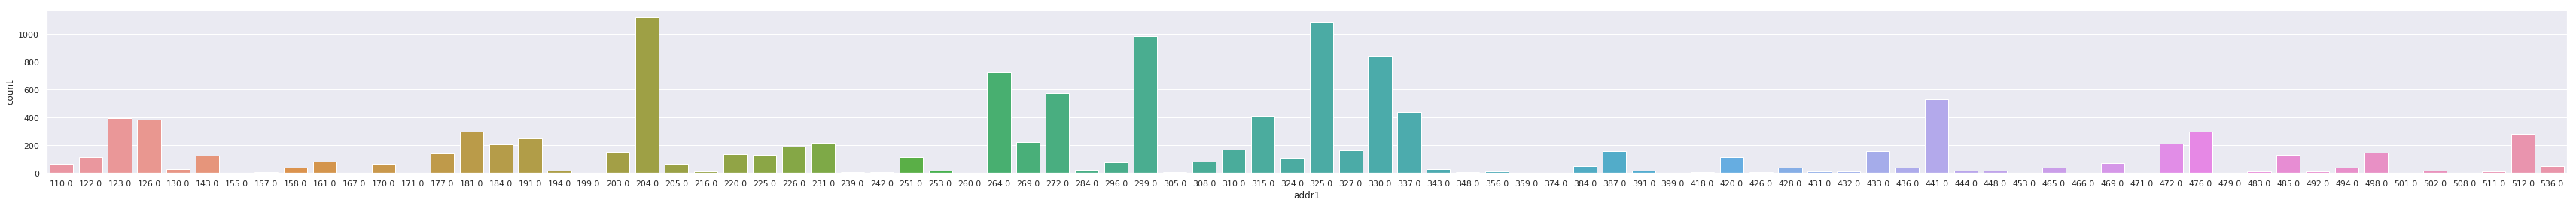

In [0]:

sns.set(rc={'figure.figsize':(60,4)})
sns.countplot(x="addr1", data=fraudulent_transaction_df);


In [0]:
non_fraudulent_transaction_df['addr1'].value_counts().head(10)


299.0    45350
325.0    41664
204.0    40900
264.0    39142
330.0    25447
315.0    22667
441.0    20294
272.0    19565
123.0    15707
184.0    14954
Name: addr1, dtype: int64

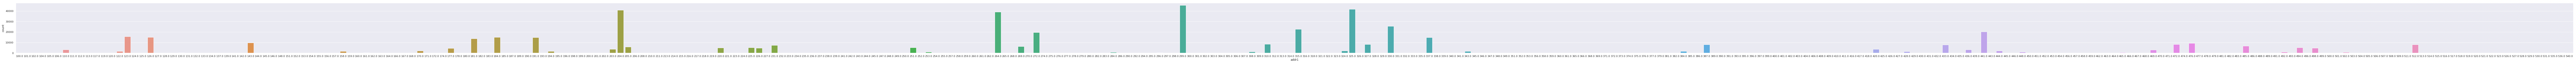

In [0]:

sns.set(rc={'figure.figsize':(200,4)})
sns.countplot(x="addr1", data=non_fraudulent_transaction_df);

In [0]:
fraudulent_transaction_df['addr2'].value_counts().head(10)


87.0    12477
60.0      279
96.0       89
65.0       44
10.0        8
32.0        6
51.0        4
46.0        3
54.0        2
92.0        2
Name: addr2, dtype: int64

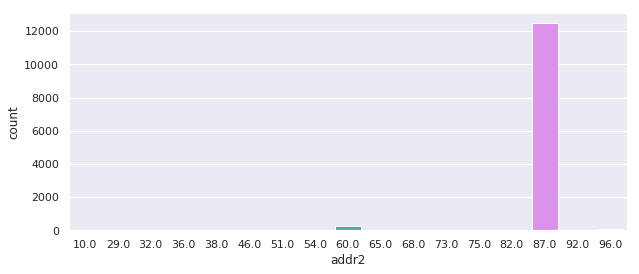

In [0]:

sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x="addr2", data=fraudulent_transaction_df);


In [0]:
non_fraudulent_transaction_df['addr2'].value_counts().head(10)


87.0    508004
60.0      2805
96.0       549
32.0        85
16.0        55
31.0        47
65.0        38
19.0        33
26.0        25
27.0        20
Name: addr2, dtype: int64

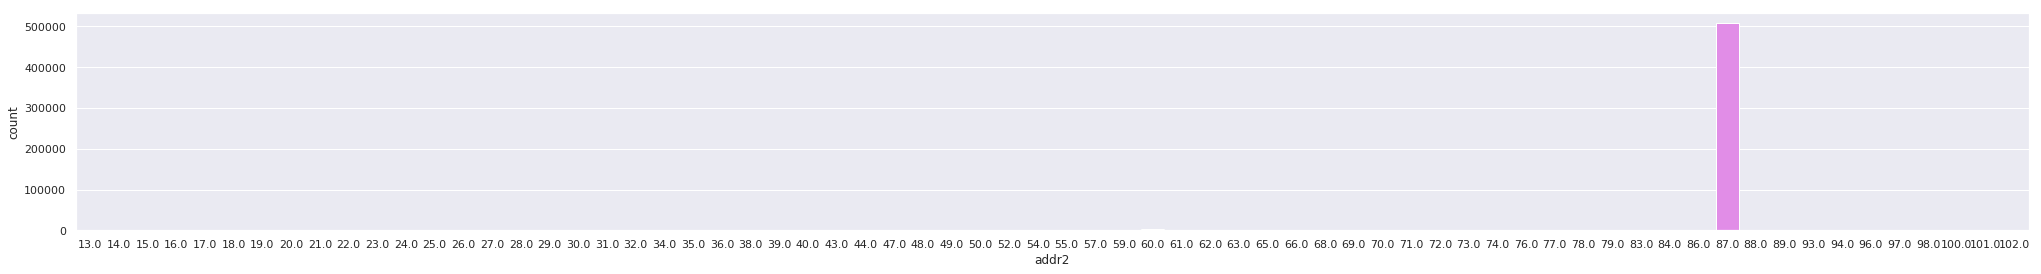

In [0]:

sns.set(rc={'figure.figsize':(35,4)})
sns.countplot(x="addr2", data=non_fraudulent_transaction_df);

### dist1 / dist2

Looking at dist1 values, we see that 0,1, and 2 lie in top five for both the fraud and non fraud transactions.


Looking at dist2 values, we see that 0,1,9, and 7 lie in top five for both the fraud and non fraud transactions.

In [0]:
fraudulent_transaction_df['dist1'].value_counts().head(10)


1.0     512
0.0     380
5.0     267
4.0     215
2.0     200
3.0     150
9.0     146
6.0     144
7.0     137
10.0    119
Name: dist1, dtype: int64

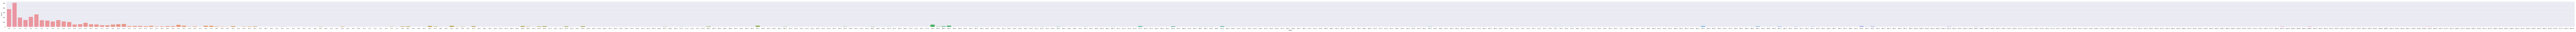

In [0]:

sns.set(rc={'figure.figsize':(400,4)})
sns.countplot(x="dist1", data=fraudulent_transaction_df);


In [0]:
non_fraudulent_transaction_df['dist1'].value_counts().head(10)


0.0    19444
1.0    17818
2.0    16828
4.0    12852
3.0    12658
5.0    11737
6.0     9699
7.0     9203
8.0     7614
9.0     7582
Name: dist1, dtype: int64

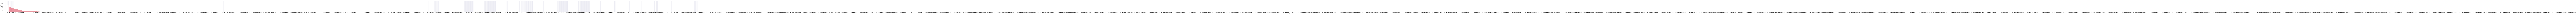

In [0]:

sns.set(rc={'figure.figsize':(909,4)})
sns.countplot(x="dist1", data=non_fraudulent_transaction_df);

In [0]:
fraudulent_transaction_df['dist2'].value_counts().head(10)


0.0      540
7.0      496
1.0      192
9.0      110
17.0      71
199.0     70
49.0      56
478.0     55
150.0     51
446.0     48
Name: dist2, dtype: int64

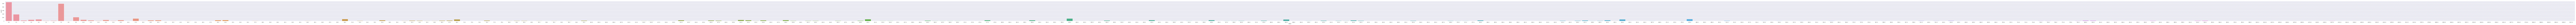

In [0]:

sns.set(rc={'figure.figsize':(500,4)})
sns.countplot(x="dist2", data=fraudulent_transaction_df);


In [0]:
non_fraudulent_transaction_df['dist2'].value_counts().head(10)


7.0     5191
0.0     2979
1.0     1182
9.0      632
4.0      612
2.0      536
3.0      452
68.0     438
6.0      402
13.0     366
Name: dist2, dtype: int64

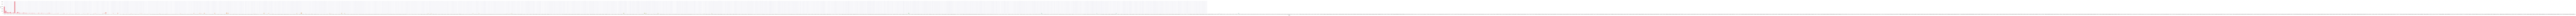

In [0]:

sns.set(rc={'figure.figsize':(800,4)})
sns.countplot(x="dist2", data=non_fraudulent_transaction_df);

## Part 2 - Transaction Frequency

In [0]:
# TODO: code to generate the frequency graph



In [160]:
fraudulent_transaction_df['addr2'].value_counts().head(10)

87.0    12477
60.0      279
96.0       89
65.0       44
10.0        8
32.0        6
51.0        4
46.0        3
54.0        2
92.0        2
Name: addr2, dtype: int64

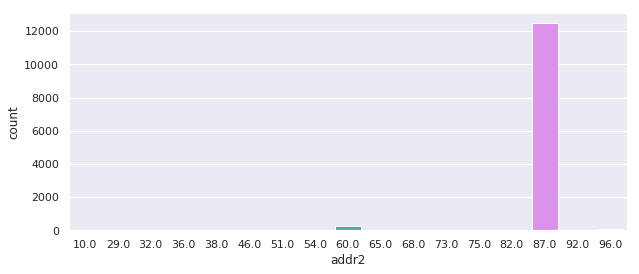

In [161]:

sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x="addr2", data=fraudulent_transaction_df);

## Part 3 - Product Code

In [0]:
# TODO: code to analyze prices for different product codes

In [0]:

ProductAndAmount_transaction = transaction_df[['ProductCD' , 'TransactionAmt']]
ProductAndAmount_transaction['ProductCD'].unique()



array(['W', 'H', 'C', 'S', 'R'], dtype=object)

In [0]:
W_ProductCD_TransactionAmt= ProductAndAmount_transaction.loc[ProductAndAmount_transaction['ProductCD'] == 'W']
H_ProductCD_TransactionAmt= ProductAndAmount_transaction.loc[ProductAndAmount_transaction['ProductCD'] == 'H']
C_ProductCD_TransactionAmt= ProductAndAmount_transaction.loc[ProductAndAmount_transaction['ProductCD'] == 'C']
S_ProductCD_TransactionAmt= ProductAndAmount_transaction.loc[ProductAndAmount_transaction['ProductCD'] == 'S']
R_ProductCD_TransactionAmt= ProductAndAmount_transaction.loc[ProductAndAmount_transaction['ProductCD'] == 'R']

In [0]:
W_ProductCD_TransactionAmt.describe()

,TransactionAmt
count,439670.000000
mean,153.158554
std,268.733692
min,1.000000
25%,49.000000
50%,78.500000
75%,146.000000
max,31937.391000


In [0]:
H_ProductCD_TransactionAmt.describe()


,TransactionAmt
count,33024.000000
mean,73.170058
std,61.950955
min,15.000000
25%,35.000000
50%,50.000000
75%,100.000000
max,500.000000


In [0]:
C_ProductCD_TransactionAmt.describe()


,TransactionAmt
count,68519.000000
mean,42.872353
std,38.943070
min,0.251000
25%,18.423000
50%,31.191000
75%,54.102000
max,712.896000


In [0]:
S_ProductCD_TransactionAmt.describe()


,TransactionAmt
count,11628.000000
mean,60.269487
std,80.546775
min,5.000000
25%,20.000000
50%,35.000000
75%,80.000000
max,1550.000000


In [0]:
R_ProductCD_TransactionAmt.describe()

,TransactionAmt
count,37699.000000
mean,168.306188
std,142.035568
min,25.000000
25%,100.000000
50%,125.000000
75%,200.000000
max,1800.000000


Most Expensive  : W seems to be the most expensive one as it has a max transaction value of 31937.391000

Least Expensive : C seems to be the least expensive one as it has a minimum transaction value of 0.251000

## Part 4 - Correlation Coefficient

In [0]:
# TODO: code to calculate correlation coefficient

In [0]:
correlationCoeffColumns = transaction_df[['TransactionDT','TransactionAmt']]
pearson_corr = correlationCoeffColumns.corr(method='pearson')
spearman_corr = correlationCoeffColumns.corr(method='spearman')

In [0]:
pearson_corr  #Pearson Coefficient

,TransactionDT,TransactionAmt
TransactionDT,1.00000,0.01192
TransactionAmt,0.01192,1.00000


In [0]:
spearman_corr   #spearman Coefficient

,TransactionDT,TransactionAmt
TransactionDT,1.000000,0.004376
TransactionAmt,0.004376,1.000000


Write your answer here

## Part 5 - Interesting Plot

In [0]:
# TODO: code to generate the plot here.

In [0]:
cardAMT_Fraud = fraudulent_transaction_df[['TransactionAmt', 'card4']]



In [0]:
cardAMT_Fraud.head()

,TransactionAmt,card4
203,445.000,visa
240,37.098,visa
243,37.098,visa
245,37.098,visa
288,155.521,visa


In [0]:
cardAMT_Fraud.card4.unique()

array(['visa', 'mastercard', 'discover', 'american express', nan],
      dtype=object)

In [0]:

visa_fraud = cardAMT_Fraud.loc[cardAMT_Fraud['card4'] == 'visa']
mastercard_fraud = cardAMT_Fraud.loc[cardAMT_Fraud['card4'] == 'mastercard']
discover_fraud = cardAMT_Fraud.loc[cardAMT_Fraud['card4'] == 'discover']
amex_fraud = cardAMT_Fraud.loc[cardAMT_Fraud['card4'] == 'american express']

In [0]:
visa_fraud.describe()


,TransactionAmt
count,13373.000000
mean,149.383523
std,240.675308
min,0.292000
25%,35.950000
50%,75.000000
75%,158.618000
max,5191.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97b957278>]],
      dtype=object)

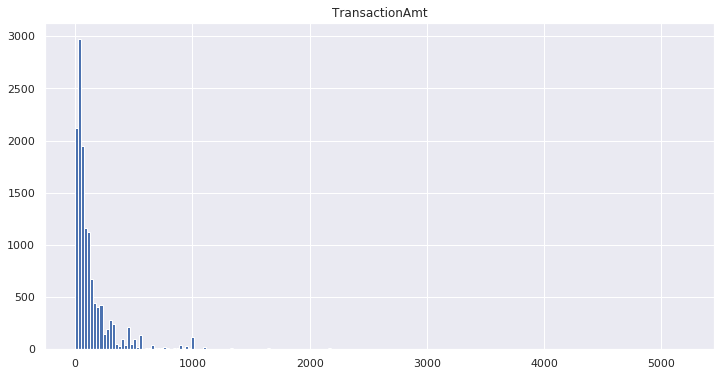

In [0]:
visa_fraud.hist(column='TransactionAmt',figsize=[12,6] ,bins=200)

In [0]:
mastercard_fraud.describe()

,TransactionAmt
count,6496.000000
mean,131.733248
std,192.623251
min,0.467000
25%,32.356000
50%,65.799000
75%,150.000000
max,3260.050000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97bdb24a8>]],
      dtype=object)

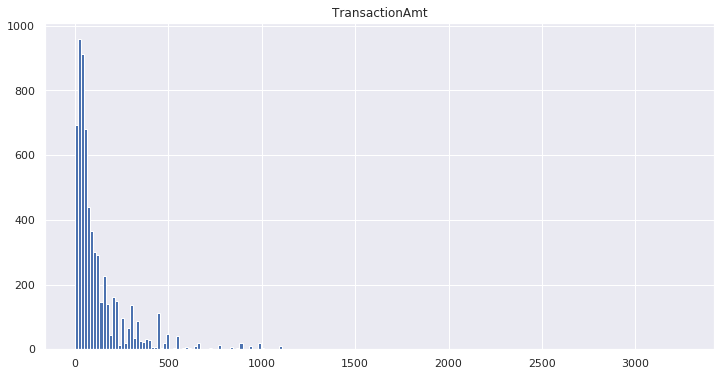

In [0]:
mastercard_fraud.hist(column='TransactionAmt',figsize=[12,6] ,bins=200)

In [0]:
discover_fraud.describe()


,TransactionAmt
count,514.000000
mean,354.086459
std,372.761816
min,15.000000
25%,90.000000
50%,226.000000
75%,470.000000
max,3133.060000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97b937668>]],
      dtype=object)

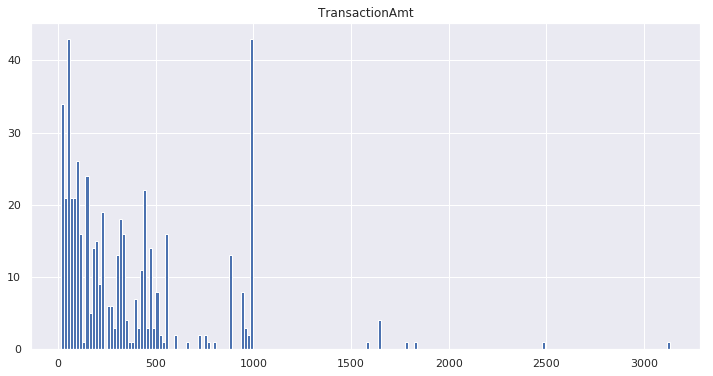

In [0]:
discover_fraud.hist(column='TransactionAmt',figsize=[12,6] ,bins=200)

In [0]:
amex_fraud.describe()


,TransactionAmt
count,239.000000
mean,179.071900
std,107.318695
min,5.000000
25%,100.000000
50%,150.000000
75%,250.000000
max,500.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97b9ab390>]],
      dtype=object)

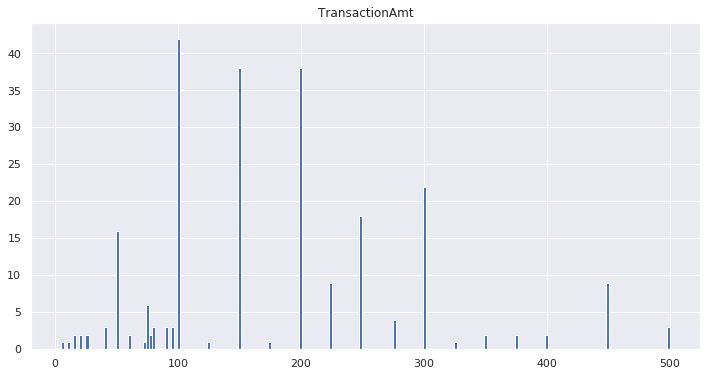

In [0]:
amex_fraud.hist(column='TransactionAmt',figsize=[12,6] ,bins=200)

In [0]:
cardAMT_NonFraud = non_fraudulent_transaction_df[['TransactionAmt', 'card4']]


visa_Nonfraud = cardAMT_NonFraud.loc[cardAMT_NonFraud['card4'] == 'visa']
mastercard_Nonfraud = cardAMT_NonFraud.loc[cardAMT_NonFraud['card4'] == 'mastercard']
discover_Nonfraud = cardAMT_NonFraud.loc[cardAMT_NonFraud['card4'] == 'discover']
amex_Nonfraud = cardAMT_NonFraud.loc[cardAMT_NonFraud['card4'] == 'american express']

In [0]:
visa_Nonfraud.describe()


,TransactionAmt
count,371394.000000
mean,132.577701
std,227.717456
min,0.251000
25%,44.000000
50%,68.500000
75%,117.000000
max,6450.970000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97b28d0b8>]],
      dtype=object)

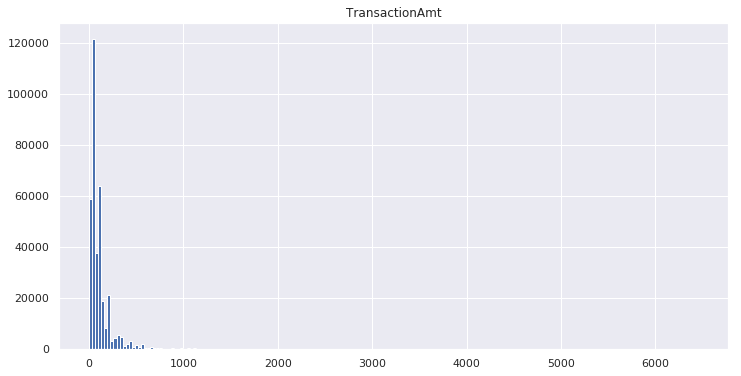

In [0]:
visa_Nonfraud.hist(column='TransactionAmt',figsize=[12,6] ,bins=200)

In [0]:
mastercard_Nonfraud.describe()


,TransactionAmt
count,182721.000000
mean,132.410999
std,255.823898
min,0.272000
25%,39.000000
50%,62.090000
75%,117.000000
max,31937.391000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97e7652e8>]],
      dtype=object)

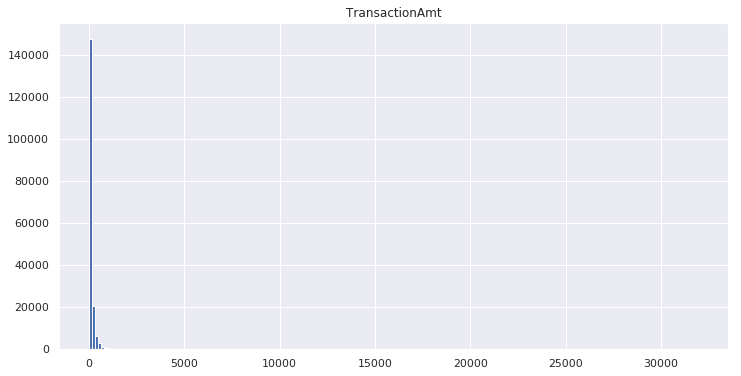

In [0]:
mastercard_Nonfraud.hist(column='TransactionAmt',figsize=[12,6] ,bins=200)

In [0]:
discover_Nonfraud.describe()


,TransactionAmt
count,6137.000000
mean,258.351905
std,403.925832
min,5.000000
25%,57.950000
50%,115.000000
75%,279.950000
max,4817.580000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97c49beb8>]],
      dtype=object)

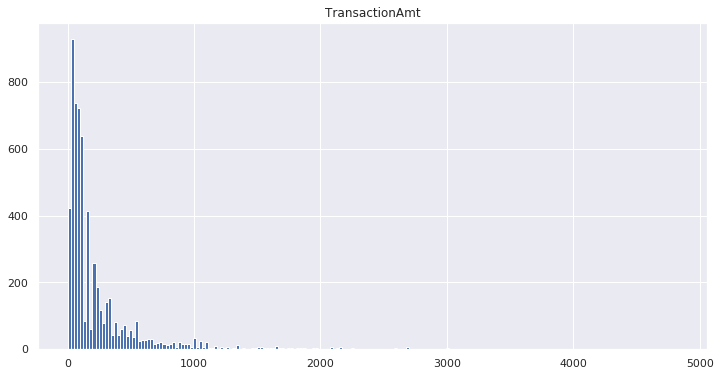

In [0]:
discover_Nonfraud.hist(column='TransactionAmt',figsize=[12,6] ,bins=200)

In [0]:
amex_Nonfraud.describe()


,TransactionAmt
count,8089.000000
mean,172.879423
std,163.803356
min,5.000000
25%,100.000000
50%,125.000000
75%,200.000000
max,1800.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97c1f89e8>]],
      dtype=object)

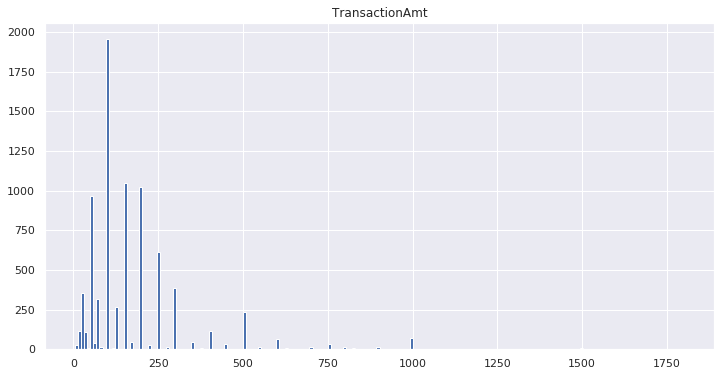

In [0]:
amex_Nonfraud.hist(column='TransactionAmt',figsize=[12,6] ,bins=200)

To find out something interesting about the dataset, I am trying to look into the card providers and the value  of fraudulent transaction that takes place.

We see that visa, american express, and mastercard has mean fraud transaction value at around 150, while discover has about 350. Thus making it more risky. 

Also we notice that American Express and Discover have peaks of fradulent transactions that are more widely spread as compared to Visa and Mastercard. For Visa and Mastercard, most of the fradulent transactions occur for comparitively lower values. 

## Part 6 - Prediction Model

In [0]:
# TODO: code for your final model

In [0]:
identity_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [0]:
identity_df['DeviceInfo'].value_counts().head()


Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
Name: DeviceInfo, dtype: int64

In [0]:
training_identity=identity_df.copy()

In [0]:
identity_columns = ['TransactionID','id_01','id_31','DeviceType']
training_identity = training_identity[identity_columns]

In [0]:
training_identity.head()

,TransactionID,id_01,id_31,DeviceType
0,2987004,0.0,samsung browser 6.2,mobile
1,2987008,-5.0,mobile safari 11.0,mobile
2,2987010,-5.0,chrome 62.0,desktop
3,2987011,-5.0,chrome 62.0,desktop
4,2987016,0.0,chrome 62.0,desktop


In [0]:
training_identity.dropna(axis=0,inplace=True)
training_identity.shape


(140232, 4)

In [0]:
training_transaction=transaction_df.copy()
training_transaction.shape

(590540, 394)

In [0]:
transaction_columns=['TransactionID','isFraud','TransactionDT','TransactionAmt','ProductCD','card4','card6','addr1','addr2','P_emaildomain' ]
training_transaction=training_transaction[transaction_columns]


In [0]:
training_transaction.shape

(590540, 10)

In [0]:
training_transaction.dropna(axis=0,inplace=True)
training_transaction.shape

(431503, 10)

In [0]:
training_innerJoin = pd.merge(training_transaction, training_identity, on='TransactionID', how='inner')

In [0]:
training_innerJoin.shape

(70275, 13)

In [0]:
output_innerJoin = training_innerJoin['isFraud']

In [0]:
training_innerJoin.drop('isFraud', axis=1, inplace=True)


In [0]:
ProductCD_dummies = pd.get_dummies(training_innerJoin.ProductCD)
cardCompany_card4_dummies = pd.get_dummies(training_innerJoin.card4)
cardType_card6_dummies = pd.get_dummies(training_innerJoin.card6)
P_emaildomain_dummies = pd.get_dummies(training_innerJoin.P_emaildomain)
id31_browser_dummies = pd.get_dummies(training_innerJoin.id_31)
DeviceType_dummies = pd.get_dummies(training_innerJoin.DeviceType)

In [0]:
training_innerJoin = pd.concat([training_innerJoin, ProductCD_dummies,cardCompany_card4_dummies,cardType_card6_dummies, P_emaildomain_dummies,id31_browser_dummies,DeviceType_dummies], axis=1)

In [0]:
training_innerJoin.drop(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'id_31', 'DeviceType'], axis=1, inplace=True)

In [0]:
test1 = training_innerJoin.copy()
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(test1) 
test1.loc[:,:] = scaled_values

In [0]:
training_innerJoin_final=test1.copy()

In [0]:
training_innerJoin_final.shape

(70275, 186)

In [0]:
diff_train_test = ['hotmail.de',
 'servicios-ta.com',
 'yahoo.de',
 'yahoo.es',
 'Generic/Android',
 'Generic/Android 7.0',
 'Microsoft/Windows',
 'Nokia/Lumia',
 'Samsung/SCH',
 'Samsung/SM-G532M',
 'aol',
 'chrome 49.0 for android',
 'chrome 53.0 for android',
 'chrome generic',
 'chrome generic for android',
 'comodo',
 'cyberfox',
 'firefox generic',
 'icedragon',
 'mobile safari generic',
 'mobile safari uiwebview',
 'opera 49.0',
 'opera 51.0',
 'opera 52.0',
 'opera generic',
 'safari generic',
 'samsung browser 5.4',
 'samsung browser generic',
 'seamonkey',
 'silk',
 'waterfox']

In [0]:
training_innerJoin_final.drop(diff_train_test, axis = 1,inplace = True) 
training_innerJoin_final.shape

(70275, 155)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(training_innerJoin_final,output_innerJoin,train_size=0.8,test_size=0.2,random_state=42)

In [0]:
randomForest_1=RandomForestRegressor(n_estimators=10,max_depth=7,min_samples_split=1500,min_samples_leaf =500 ,random_state=42)
randomForest_1.fit(X_train,y_train)
prediction1 = randomForest_1.predict(X_valid)
error1 = mean_absolute_error(y_valid, prediction1)
print(error1)

0.07647827683049051


In [0]:
randomForest=RandomForestRegressor(n_estimators=50,max_depth=9,min_samples_split=1000,min_samples_leaf =500 ,random_state=42)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_valid)
error = mean_absolute_error(y_valid, prediction)
print(error)

0.07599385454803004


In [0]:
randomForest=RandomForestRegressor(n_estimators=100,max_depth=9,min_samples_split=6000,min_samples_leaf =300 ,random_state=42)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_valid)
error = mean_absolute_error(y_valid, prediction)
print(error)

0.07955021692451357


In [0]:
randomForest=RandomForestRegressor(n_estimators=150,max_depth=13,min_samples_split=600,min_samples_leaf =300 ,random_state=42)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_valid)
error = mean_absolute_error(y_valid, prediction)
print(error)

0.07224779558281781


In [0]:
randomForest=RandomForestRegressor(n_estimators=250,max_depth=13,min_samples_split=200,min_samples_leaf =100 ,random_state=42)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_valid)
error = mean_absolute_error(y_valid, prediction)
print(error)

0.06831568952030936


In [155]:
randomForest=RandomForestRegressor(n_estimators=250,max_depth=13,min_samples_split=100,min_samples_leaf =50 ,random_state=42)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_valid)
error = mean_absolute_error(y_valid, prediction)
print(error)

0.06575013092211475


In [156]:
randomForest=RandomForestRegressor(n_estimators=200,max_depth=15,min_samples_split=50,min_samples_leaf =20 ,random_state=42)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_valid)
error = mean_absolute_error(y_valid, prediction)
print(error)

0.06169012693575922


In [0]:
train_columnValues = X_valid.columns.values

In [0]:
diff_train_test = ['hotmail.de',
 'servicios-ta.com',
 'yahoo.de',
 'yahoo.es',
 'Generic/Android',
 'Generic/Android 7.0',
 'Microsoft/Windows',
 'Nokia/Lumia',
 'Samsung/SCH',
 'Samsung/SM-G532M',
 'aol',
 'chrome 49.0 for android',
 'chrome 53.0 for android',
 'chrome generic',
 'chrome generic for android',
 'comodo',
 'cyberfox',
 'firefox generic',
 'icedragon',
 'mobile safari generic',
 'mobile safari uiwebview',
 'opera 49.0',
 'opera 51.0',
 'opera 52.0',
 'opera generic',
 'safari generic',
 'samsung browser 5.4',
 'samsung browser generic',
 'seamonkey',
 'silk',
 'waterfox']

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [164]:
link3='https://drive.google.com/open?id=19LTT8vFjYgyAEqhpKV_8ewgrcrQxTq2l'

fluff, id = link3.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_transaction.csv') 
test_transaction_df = pd.read_csv('test_transaction.csv')

19LTT8vFjYgyAEqhpKV_8ewgrcrQxTq2l


In [165]:
link4='https://drive.google.com/open?id=1Hhz_TzAi2YZrXkGZFQz1VTOpIe_bupre'

fluff, id = link4.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_identity.csv') 
test_identity_df = pd.read_csv('test_identity.csv')

1Hhz_TzAi2YZrXkGZFQz1VTOpIe_bupre


In [166]:
test_identity_df = test_identity_df[identity_columns]
test_identity_df.dropna(axis=0,inplace=True)
test_identity_df.shape

(136607, 4)

In [167]:
test_transaction_columns=['TransactionID','TransactionDT','TransactionAmt','ProductCD','card4','card6','addr1','addr2','P_emaildomain' ]
test_transaction_df=test_transaction_df[test_transaction_columns]
test_transaction_df.dropna(axis=0,inplace=True)
test_transaction_df.shape

(369917, 9)

In [0]:
test_innerJoin = pd.merge(test_transaction_df, test_identity_df, on='TransactionID', how='inner')

In [0]:
ProductCD_dummies = pd.get_dummies(test_innerJoin.ProductCD)
cardCompany_card4_dummies = pd.get_dummies(test_innerJoin.card4)
cardType_card6_dummies = pd.get_dummies(test_innerJoin.card6)
P_emaildomain_dummies = pd.get_dummies(test_innerJoin.P_emaildomain)
id31_browser_dummies = pd.get_dummies(test_innerJoin.id_31)
DeviceType_dummies = pd.get_dummies(test_innerJoin.DeviceType)
#DeviceInfo_dummies= pd.get_dummies(test_innerJoin.DeviceInfo)

test_innerJoin = pd.concat([test_innerJoin, ProductCD_dummies,cardCompany_card4_dummies,cardType_card6_dummies, P_emaildomain_dummies,id31_browser_dummies,DeviceType_dummies], axis=1)

test_innerJoin.drop(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'id_31', 'DeviceType'], axis=1, inplace=True)

In [170]:
test_innerJoin.shape

(63101, 201)

In [0]:
diff_test_train = ['scranton.edu',
 'blackberry',
 'chrome 67.0 for android',
 'chrome 67.0 for ios',
 'chrome 68.0',
 'chrome 68.0 for android',
 'chrome 68.0 for ios',
 'chrome 69.0 for android',
 'chrome 69.0 for ios',
 'chrome 70.0',
 'chrome 70.0 for android',
 'chrome 70.0 for ios',
 'chrome 71.0',
 'chrome 71.0 for android',
 'chrome 71.0 for ios',
 'edge 18.0',
 'facebook',
 'firefox 61.0',
 'firefox 62.0',
 'firefox 63.0',
 'firefox 64.0',
 'firefox mobile 61.0',
 'firefox mobile 62.0',
 'firefox mobile 63.0',
 'google search application 52.0',
 'google search application 54.0',
 'google search application 56.0',
 'google search application 58.0',
 'google search application 59.0',
 'google search application 60.0',
 'google search application 61.0',
 'google search application 62.0',
 'google search application 63.0',
 'google search application 64.0',
 'google search application 65.0',
 'mobile safari 12.0',
 'opera 53.0',
 'opera 54.0',
 'opera 55.0',
 'opera 56.0',
 'safari 12.0',
 'samsung browser 3.3',
 'samsung browser 4.2',
 'samsung browser 7.2',
 'samsung browser 7.4',
 'samsung browser 8.2']

In [0]:
test_innerJoin.drop(diff_test_train, axis = 1,inplace = True) 

In [0]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(test_innerJoin) 
test_innerJoin.loc[:,:] = scaled_values

In [0]:
test_final = test_innerJoin.copy()

In [0]:
prediction = randomForest.predict(test_final)

To predict the fraudulent transactions, I have used Random Forests to make the preictions. 

Bofore that, i have done : 

 > One Hot encoding of the categorical values
 
 > normlization of numerical values 


I have tried mixing up multiple parameters such as :

n_estimators
max_depth
min_samples_split,
min_samples_leaf

I am getting an mse error of about 0.65
Thus I am getting an accuracy of about 94 percent

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: FILL HERE

Highest Rank: I was not able to make a submission on kaggle, thus I am submitting the submission.csv file wih the other files and notebooks 

Score: FILL HERE

Number of entries: FILL HERE

INCLUDE IMAGE OF YOUR KAGGLE RANKING